# Load and analyze the dataset

The dataset is available on [Mendeley](https://data.mendeley.com/datasets/bv2hvm4pmz/3) and the article is published at [Elseiver](https://www.sciencedirect.com/science/article/pii/S2352340923008831).

We have analyzed the dataset and it consists of three files (brown, gold, and silver), and we have worked exclusively with the gold dataset. Not only that, we have developed models which can classify. The model used in our research are Random Forest, Neural Network, XGBoost and Linear Regression,LSTM,ARIMA,GNN.

In [1]:
!pip install gdown

# taking all the necessary imports

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm # scipy.stats is a module
from scipy.stats import norm, t, ttest_ind, ttest_rel
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Loading the file

In [4]:


file_path = '/kaggle/input/air-quality/complete_measure_node_airport_gold.csv'  # ginving the file path

# Load the CSV file using the correct delimiter
df = pd.read_csv(file_path)
row = len(df)
print(row)

7105451


# Load and reorder dataset

In [5]:

# Load the CSV file using the correct delimiter
df = pd.read_csv(file_path, delimiter=";")

# Print the columns in their current order
print("Current Column Order:")
print(list(df.columns))

# Define the correct column order
correct_order = [
    "id_measure", "node_id", "ads1115_value", "ads1115_voltage", "scd30_co2",
    "scd30_temp", "scd30_hum", "sps30_pm05_count", "sps30_pm1_count",
    "sps30_pm1_ug", "sps30_pm25_count", "sps30_pm25_ug", "sps30_pm4_count",
    "sps30_pm4_ug", "sps30_pm10_count", "sps30_pm10_ug", "sps30_pm_typ",
    "ts_insertion"
]

# Check if all expected columns are present
if set(correct_order) == set(df.columns):
    # Reorder the DataFrame
    df = df[correct_order]
    print("Data reordered successfully.")
else:
    # Detect missing or extra columns
    missing_columns = [col for col in correct_order if col not in df.columns]
    extra_columns = [col for col in df.columns if col not in correct_order]
    print("Error: Missing or extra columns detected.")
    if missing_columns:
        print("Missing Columns:", missing_columns)
    if extra_columns:
        print("Extra Columns:", extra_columns)

Current Column Order:
['id_measure', 'node_id', 'ads1115_value', 'ads1115_voltage', 'scd30_co2', 'scd30_temp', 'scd30_hum', 'sps30_pm05_count', 'sps30_pm1_count', 'sps30_pm1_ug', 'sps30_pm25_count', 'sps30_pm25_ug', 'sps30_pm4_count', 'sps30_pm4_ug', 'sps30_pm10_count', 'sps30_pm10_ug', 'sps30_pm_typ', 'ts_insertion']
Data reordered successfully.


# dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105451 entries, 0 to 7105450
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_measure        int64  
 1   node_id           object 
 2   ads1115_value     int64  
 3   ads1115_voltage   float64
 4   scd30_co2         float64
 5   scd30_temp        float64
 6   scd30_hum         float64
 7   sps30_pm05_count  float64
 8   sps30_pm1_count   float64
 9   sps30_pm1_ug      float64
 10  sps30_pm25_count  float64
 11  sps30_pm25_ug     float64
 12  sps30_pm4_count   float64
 13  sps30_pm4_ug      float64
 14  sps30_pm10_count  float64
 15  sps30_pm10_ug     float64
 16  sps30_pm_typ      float64
 17  ts_insertion      object 
dtypes: float64(14), int64(2), object(2)
memory usage: 975.8+ MB


# show the dataset

In [6]:
df

,id_measure,node_id,ads1115_value,ads1115_voltage,scd30_co2,scd30_temp,scd30_hum,sps30_pm05_count,sps30_pm1_count,sps30_pm1_ug,sps30_pm25_count,sps30_pm25_ug,sps30_pm4_count,sps30_pm4_ug,sps30_pm10_count,sps30_pm10_ug,sps30_pm_typ,ts_insertion
0,1,node-air-gold,1950,0.243757,606.316,29.3313,51.7258,26.4676,31.5050,3.97163,31.6969,4.19985,31.7065,4.19985,31.7126,4.19985,0.553393,2022-10-27 10:55:14
1,2,node-air-gold,1997,0.249633,605.303,29.3019,51.6693,26.3993,31.4237,3.96138,31.6152,4.18902,31.6247,4.18902,31.6308,4.18902,0.549469,2022-10-27 10:55:16
2,3,node-air-gold,1997,0.249633,605.580,29.3153,51.6327,26.4615,31.4977,3.97071,31.6896,4.19888,31.6992,4.19888,31.7053,4.19888,0.550178,2022-10-27 10:55:18
3,4,node-air-gold,1977,0.247133,605.191,29.3153,51.7242,26.4615,31.4977,3.97071,31.6896,4.19888,31.6992,4.19888,31.7053,4.19888,0.550178,2022-10-27 10:55:20
4,5,node-air-gold,1957,0.244632,603.975,29.3019,51.6556,26.4615,31.4977,3.97071,31.6896,4.19888,31.6992,4.19888,31.7053,4.19888,0.550178,2022-10-27 10:55:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105446,7490026,node-air-gold,1663,0.207881,713.675,28.1483,43.4067,38.6570,46.0142,5.80072,46.2946,6.13404,46.3085,6.13405,46.3175,6.13405,0.540815,2023-10-13 08:04:12
7105447,7490027,node-air-gold,1664,0.208006,713.536,28.1483,43.3792,39.3510,46.8404,5.90487,47.1258,6.24418,47.1399,6.24418,47.1491,6.24418,0.540534,2023-10-13 08:04:14
7105448,7490028,node-air-gold,1645,0.205631,713.131,28.1617,43.3243,39.4641,46.9749,5.92183,47.2612,6.26211,47.2754,6.26212,47.2845,6.26212,0.544188,2023-10-13 08:04:17
7105449,7490029,node-air-gold,1664,0.207881,711.359,28.1617,43.3655,39.8152,47.3929,5.97452,47.6817,6.31783,47.6960,6.31783,47.7052,6.31783,0.543882,2023-10-13 08:04:19


# any garbage value if present

In [5]:
df.isnull().sum()

id_measure           0
node_id              0
ads1115_value        0
ads1115_voltage      0
scd30_co2            0
scd30_temp           0
scd30_hum            0
sps30_pm05_count    12
sps30_pm1_count     15
sps30_pm1_ug         0
sps30_pm25_count    17
sps30_pm25_ug        8
sps30_pm4_count     23
sps30_pm4_ug         9
sps30_pm10_count    23
sps30_pm10_ug       11
sps30_pm_typ        25
ts_insertion         0
dtype: int64

In [8]:
df.describe()

,id_measure,ads1115_value,ads1115_voltage,scd30_co2,scd30_temp,scd30_hum,sps30_pm05_count,sps30_pm1_count,sps30_pm1_ug,sps30_pm25_count,sps30_pm25_ug,sps30_pm4_count,sps30_pm4_ug,sps30_pm10_count,sps30_pm10_ug,sps30_pm_typ
count,7.105451e+06,7.105451e+06,7.105451e+06,7.105451e+06,7.105451e+06,7.105451e+06,7.105439e+06,7.105436e+06,7.105451e+06,7.105434e+06,7.105443e+06,7.105428e+06,7.105442e+06,7.105428e+06,7.105440e+06,7.105426e+06
mean,3.744012e+06,1.652306e+03,2.065447e-01,6.562494e+02,2.863171e+01,3.879722e+01,9.558730e+31,9.484938e+31,3.632853e+00,2.378664e+32,4.779646e+31,2.852949e+32,9.559010e+31,3.330901e+32,9.558729e+31,3.323522e+32
std,2.177232e+06,2.271290e+02,2.835373e-02,1.402297e+02,2.224686e+00,9.134442e+00,1.801799e+35,1.801853e+35,3.431872e+00,2.848946e+35,1.274064e+35,3.120871e+35,1.801799e+35,3.370916e+35,1.801799e+35,3.370945e+35
min,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.005880e+34,-2.616750e+36,1.836700e-40,-2.616750e+36,9.481450e-20,-2.616750e+36,-1.005880e+34,-2.616750e+36,-1.005880e+34,-2.616750e+36
25%,1.849316e+06,1.514000e+03,1.892560e-01,5.640120e+02,2.776910e+01,3.314670e+01,1.095590e+01,1.309490e+01,1.654640e+00,1.320360e+01,1.774360e+00,1.321240e+01,1.790150e+00,1.321560e+01,1.792730e+00,4.866950e-01
50%,3.759168e+06,1.640000e+03,2.050060e-01,6.113940e+02,2.893870e+01,4.030460e+01,1.876020e+01,2.240190e+01,2.828590e+00,2.257260e+01,3.014150e+00,2.258460e+01,3.030490e+00,2.258980e+01,3.033730e+00,5.072100e-01
75%,5.658954e+06,1.770000e+03,2.212570e-01,7.140700e+02,2.971050e+01,4.607540e+01,2.994330e+01,3.571580e+01,4.506590e+00,3.596428e+01,4.813050e+00,3.598080e+01,4.837420e+00,3.598870e+01,4.841450e+00,5.330800e-01
max,7.490030e+06,3.276700e+04,1.192040e+00,1.840010e+03,3.353440e+01,5.831600e+01,3.396150e+38,3.396150e+38,2.504980e+02,3.396150e+38,3.396150e+38,3.396150e+38,3.396150e+38,3.396150e+38,3.396150e+38,3.396150e+38


# Fiding missing value and showing their percentage

In [6]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print("Missing Values in Each Column:")
print(missing_data)
print("Percentage of Missing Data:")
print(missing_percentage)

Missing Values in Each Column:
id_measure           0
node_id              0
ads1115_value        0
ads1115_voltage      0
scd30_co2            0
scd30_temp           0
scd30_hum            0
sps30_pm05_count    12
sps30_pm1_count     15
sps30_pm1_ug         0
sps30_pm25_count    17
sps30_pm25_ug        8
sps30_pm4_count     23
sps30_pm4_ug         9
sps30_pm10_count    23
sps30_pm10_ug       11
sps30_pm_typ        25
ts_insertion         0
dtype: int64
Percentage of Missing Data:
id_measure          0.000000
node_id             0.000000
ads1115_value       0.000000
ads1115_voltage     0.000000
scd30_co2           0.000000
scd30_temp          0.000000
scd30_hum           0.000000
sps30_pm05_count    0.000169
sps30_pm1_count     0.000211
sps30_pm1_ug        0.000000
sps30_pm25_count    0.000239
sps30_pm25_ug       0.000113
sps30_pm4_count     0.000324
sps30_pm4_ug        0.000127
sps30_pm10_count    0.000324
sps30_pm10_ug       0.000155
sps30_pm_typ        0.000352
ts_insertion        0

# Missing value bar plot

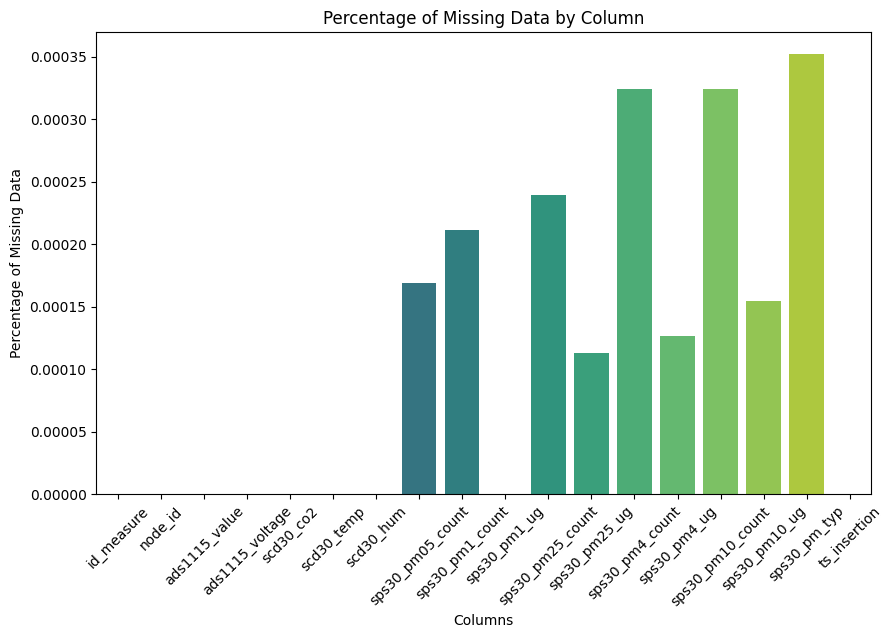

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_percentage, palette='viridis')
plt.title("Percentage of Missing Data by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Data")
plt.xticks(rotation=45)
plt.show()

# dropped the id_measure column

In [8]:
df.drop(columns=['id_measure'],inplace=True)

# Handling missing values

In [9]:
# Handle missing values
# Assuming missing values can be replaced with the mean for continuous and mode for categorical
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] =df[column].fillna(df[column].mean())

# Bar plot after handling missing value

Missing Data Summary:

                  Missing Values  Percentage
node_id                        0         0.0
ads1115_value                  0         0.0
ads1115_voltage                0         0.0
scd30_co2                      0         0.0
scd30_temp                     0         0.0
scd30_hum                      0         0.0
sps30_pm05_count               0         0.0
sps30_pm1_count                0         0.0
sps30_pm1_ug                   0         0.0
sps30_pm25_count               0         0.0
sps30_pm25_ug                  0         0.0
sps30_pm4_count                0         0.0
sps30_pm4_ug                   0         0.0
sps30_pm10_count               0         0.0
sps30_pm10_ug                  0         0.0
sps30_pm_typ                   0         0.0
ts_insertion                   0         0.0


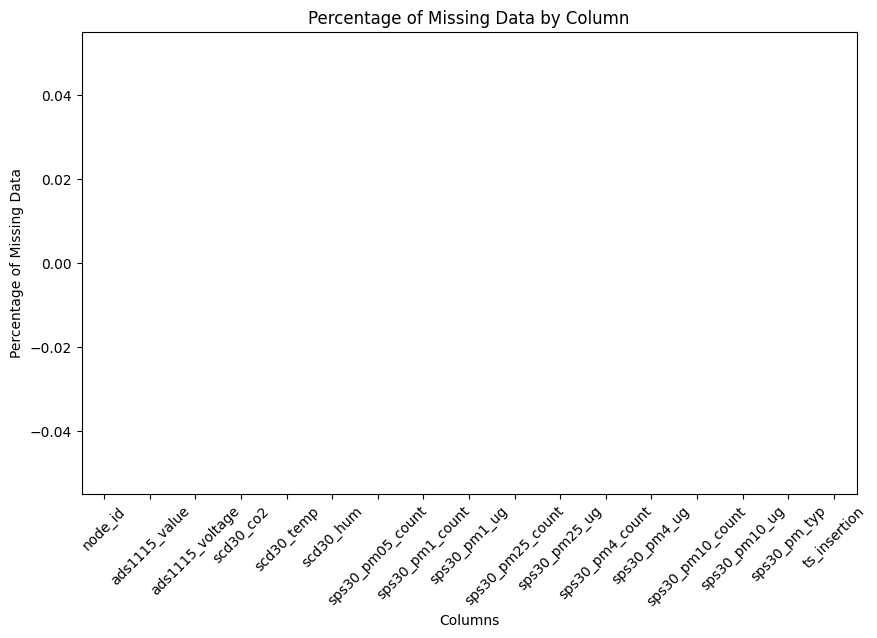

In [10]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Data Summary:\n")
print(pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
}))

# Visualizing after handling missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_percentage, palette='viridis')
plt.title("Percentage of Missing Data by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Data")
plt.xticks(rotation=45)
plt.show()

In [14]:
df

,node_id,ads1115_value,ads1115_voltage,scd30_co2,scd30_temp,scd30_hum,sps30_pm05_count,sps30_pm1_count,sps30_pm1_ug,sps30_pm25_count,sps30_pm25_ug,sps30_pm4_count,sps30_pm4_ug,sps30_pm10_count,sps30_pm10_ug,sps30_pm_typ,ts_insertion
0,node-air-gold,1950,0.243757,606.316,29.3313,51.7258,26.4676,31.5050,3.97163,31.6969,4.19985,31.7065,4.19985,31.7126,4.19985,0.553393,2022-10-27 10:55:14
1,node-air-gold,1997,0.249633,605.303,29.3019,51.6693,26.3993,31.4237,3.96138,31.6152,4.18902,31.6247,4.18902,31.6308,4.18902,0.549469,2022-10-27 10:55:16
2,node-air-gold,1997,0.249633,605.580,29.3153,51.6327,26.4615,31.4977,3.97071,31.6896,4.19888,31.6992,4.19888,31.7053,4.19888,0.550178,2022-10-27 10:55:18
3,node-air-gold,1977,0.247133,605.191,29.3153,51.7242,26.4615,31.4977,3.97071,31.6896,4.19888,31.6992,4.19888,31.7053,4.19888,0.550178,2022-10-27 10:55:20
4,node-air-gold,1957,0.244632,603.975,29.3019,51.6556,26.4615,31.4977,3.97071,31.6896,4.19888,31.6992,4.19888,31.7053,4.19888,0.550178,2022-10-27 10:55:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105446,node-air-gold,1663,0.207881,713.675,28.1483,43.4067,38.6570,46.0142,5.80072,46.2946,6.13404,46.3085,6.13405,46.3175,6.13405,0.540815,2023-10-13 08:04:12
7105447,node-air-gold,1664,0.208006,713.536,28.1483,43.3792,39.3510,46.8404,5.90487,47.1258,6.24418,47.1399,6.24418,47.1491,6.24418,0.540534,2023-10-13 08:04:14
7105448,node-air-gold,1645,0.205631,713.131,28.1617,43.3243,39.4641,46.9749,5.92183,47.2612,6.26211,47.2754,6.26212,47.2845,6.26212,0.544188,2023-10-13 08:04:17
7105449,node-air-gold,1664,0.207881,711.359,28.1617,43.3655,39.8152,47.3929,5.97452,47.6817,6.31783,47.6960,6.31783,47.7052,6.31783,0.543882,2023-10-13 08:04:19


In [15]:
df.columns

Index(['node_id', 'ads1115_value', 'ads1115_voltage', 'scd30_co2',
       'scd30_temp', 'scd30_hum', 'sps30_pm05_count', 'sps30_pm1_count',
       'sps30_pm1_ug', 'sps30_pm25_count', 'sps30_pm25_ug', 'sps30_pm4_count',
       'sps30_pm4_ug', 'sps30_pm10_count', 'sps30_pm10_ug', 'sps30_pm_typ',
       'ts_insertion'],
      dtype='object')

In [11]:
numerical_columns = ['ads1115_value', 'ads1115_voltage',
       'scd30_co2', 'scd30_temp', 'scd30_hum', 'sps30_pm05_count',
       'sps30_pm1_count', 'sps30_pm1_ug', 'sps30_pm25_count', 'sps30_pm25_ug',
       'sps30_pm4_count', 'sps30_pm4_ug', 'sps30_pm10_count', 'sps30_pm10_ug',
       'sps30_pm_typ']

# Box Plot before outlier removed

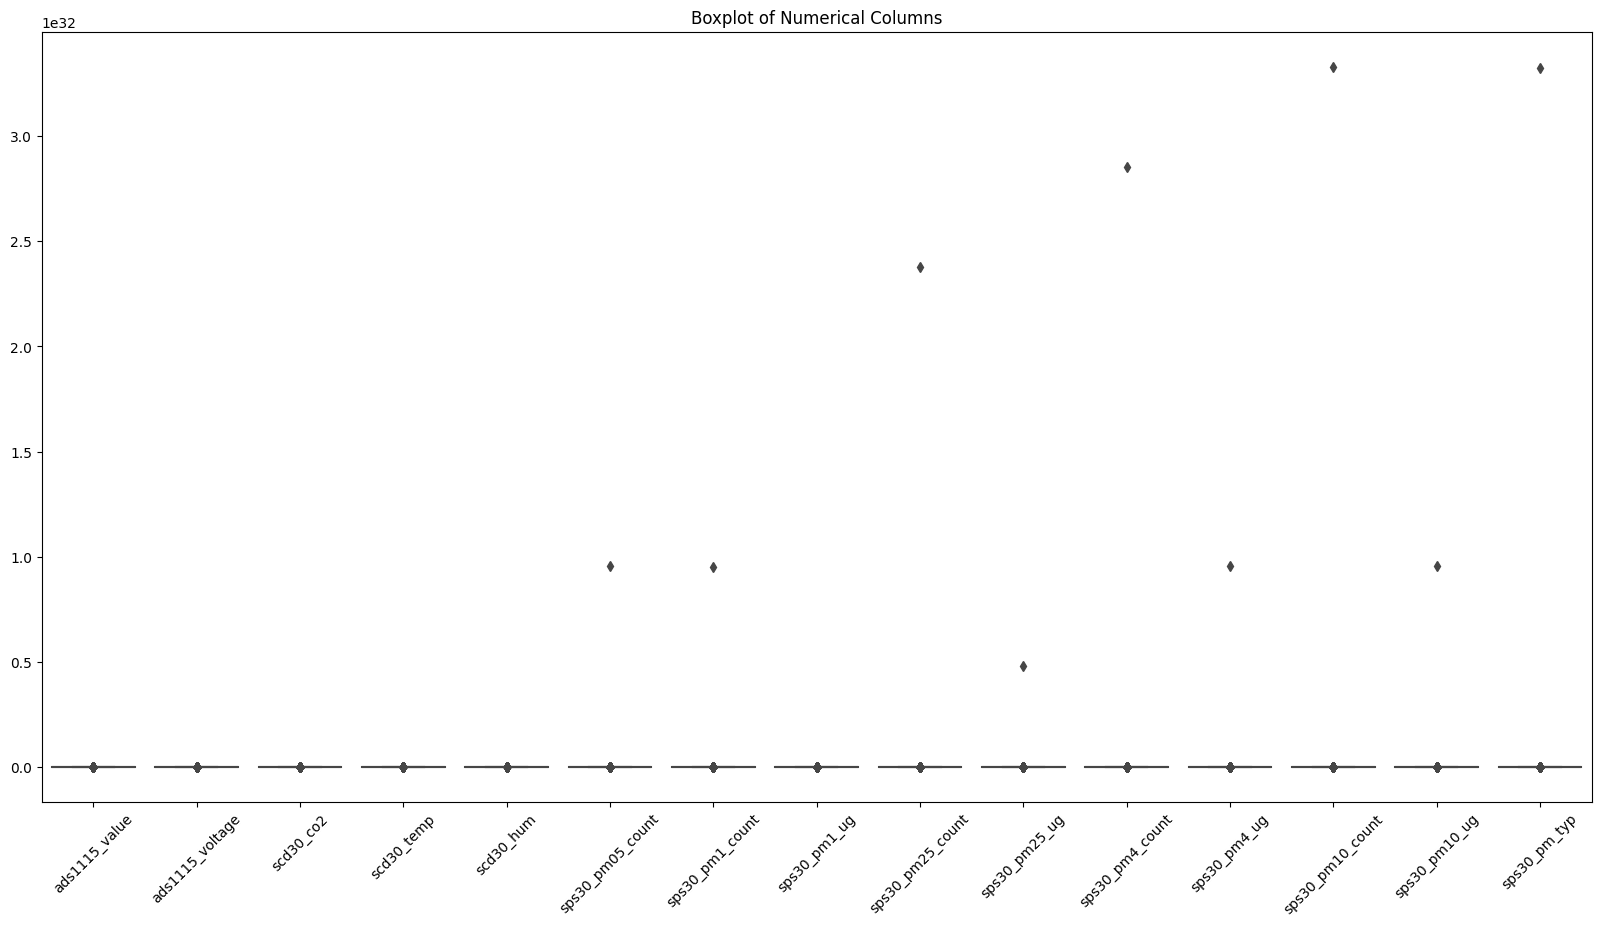

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
column_names = ['ads1115_value', 'ads1115_voltage',
       'scd30_co2', 'scd30_temp', 'scd30_hum', 'sps30_pm05_count',
       'sps30_pm1_count', 'sps30_pm1_ug', 'sps30_pm25_count', 'sps30_pm25_ug',
       'sps30_pm4_count', 'sps30_pm4_ug', 'sps30_pm10_count', 'sps30_pm10_ug',
       'sps30_pm_typ']  # Exclude 'ts_insertion'



# Sample the data for efficient plotting
sampled_data = df.sample(n=10000, random_state=42)  # Adjust sample size as needed

# Plot boxplots for numerical columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=sampled_data)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

# Removing Outliers

In [13]:
import pandas as pd

chunk_size = 800000  # Process data in chunks of 200,000 rows
columns_to_process = ['ads1115_value', 'ads1115_voltage',
                      'scd30_co2', 'scd30_temp', 'scd30_hum', 'sps30_pm05_count',
                      'sps30_pm1_count', 'sps30_pm1_ug', 'sps30_pm25_count',
                      'sps30_pm25_ug', 'sps30_pm4_count', 'sps30_pm4_ug',
                      'sps30_pm10_count', 'sps30_pm10_ug', 'sps30_pm_typ']

processed_chunks = []  # To store processed chunks

for start in range(0, len(df), chunk_size):
    # Process one chunk at a time
    chunk = df.iloc[start:start + chunk_size].copy()

    # Process each column independently for outliers
    for col in columns_to_process:
        if col in chunk.columns:  # Ensure the column exists in the DataFrame
            Q1 = chunk[col].quantile(0.25)  # 25th percentile
            Q3 = chunk[col].quantile(0.75)  # 75th percentile
            IQR = Q3 - Q1                   # Interquartile range
            lower_bound = Q1 - 1.5 * IQR    # Lower bound for outliers
            upper_bound = Q3 + 1.5 * IQR    # Upper bound for outliers

            # Filter out outliers for the column
            chunk = chunk[(chunk[col] >= lower_bound) & (chunk[col] <= upper_bound)]

    processed_chunks.append(chunk)  # Add the processed chunk to the list

# Combine all processed chunks back into one DataFrame
df = pd.concat(processed_chunks, ignore_index=True)

print("Outliers removed. Remaining data shape:", df.shape)


Outliers removed. Remaining data shape: (5928230, 17)


# Scaling the value

In [14]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df.head())

         node_id  ads1115_value  ads1115_voltage  scd30_co2  scd30_temp  \
0  node-air-gold       1.582513         1.582474  -0.357060    0.458900   
1  node-air-gold       1.821107         1.821101  -0.365810    0.437458   
2  node-air-gold       1.821107         1.821101  -0.363417    0.447231   
3  node-air-gold       1.719578         1.719574  -0.366777    0.447231   
4  node-air-gold       1.618048         1.618008  -0.377280    0.437458   

   scd30_hum  sps30_pm05_count  sps30_pm1_count  sps30_pm1_ug  \
0   1.452205          0.430595         0.430210      0.429964   
1   1.445901          0.425499         0.425114      0.424867   
2   1.441817          0.430140         0.429753      0.429506   
3   1.452027          0.430140         0.429753      0.429506   
4   1.444372          0.430140         0.429753      0.429506   

   sps30_pm25_count  sps30_pm25_ug  sps30_pm4_count  sps30_pm4_ug  \
0          0.429974       0.428257         0.429940      0.426831   
1          0.424884 

# boxplot without outliers

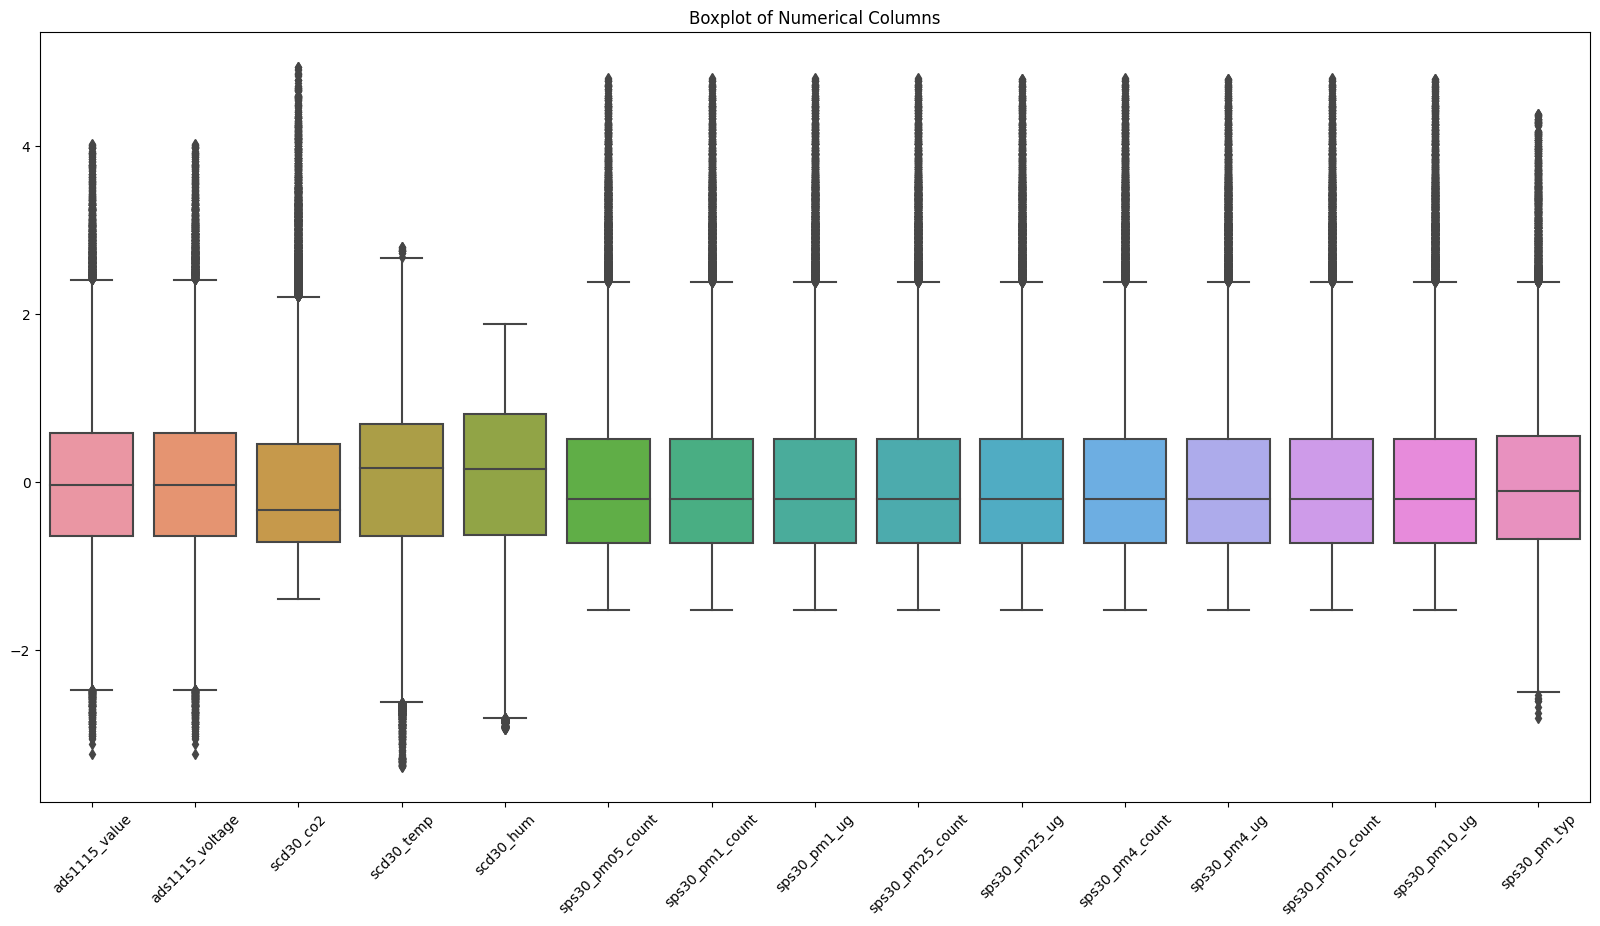

In [15]:


sampled_data = df.sample(n=50000, random_state=42)  # Adjust sample size as needed

plt.figure(figsize=(20, 10))
sns.boxplot(data=sampled_data)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

# Co-realtion matrix heat map

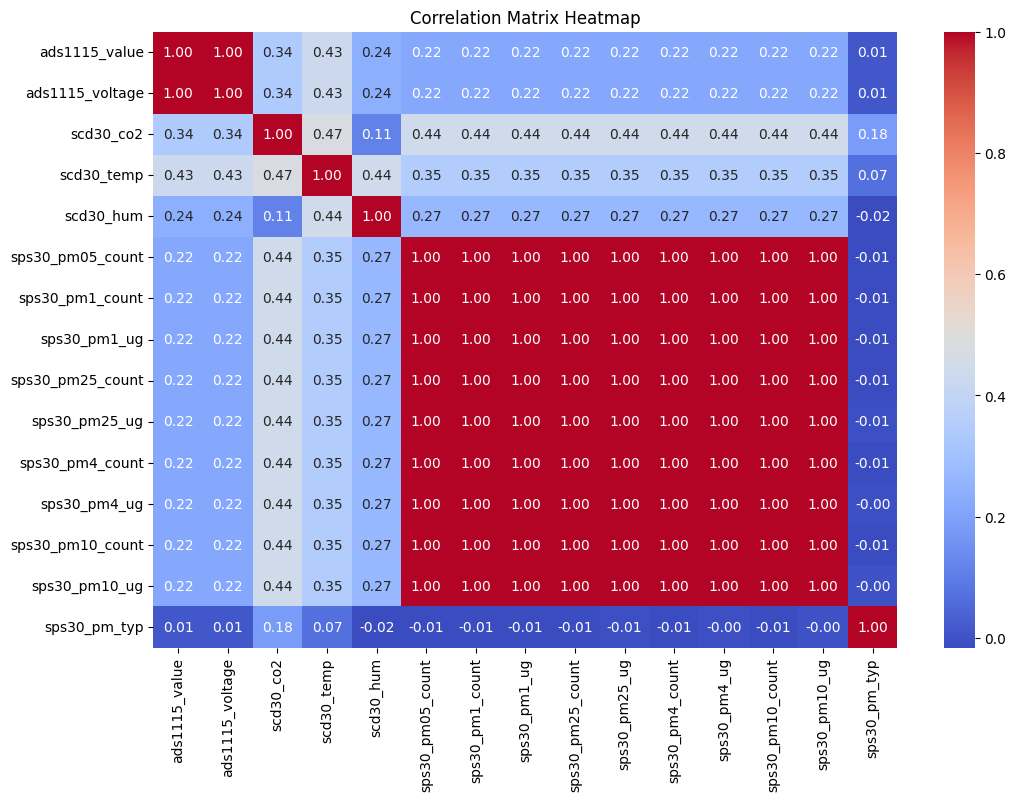

In [21]:

correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# co-relation matrix

In [22]:
correlation_matrix

,ads1115_value,ads1115_voltage,scd30_co2,scd30_temp,scd30_hum,sps30_pm05_count,sps30_pm1_count,sps30_pm1_ug,sps30_pm25_count,sps30_pm25_ug,sps30_pm4_count,sps30_pm4_ug,sps30_pm10_count,sps30_pm10_ug,sps30_pm_typ
ads1115_value,1.000000,0.999956,0.338438,0.428370,0.240198,0.218170,0.218103,0.218061,0.218063,0.217753,0.218056,0.217481,0.218055,0.217424,0.011799
ads1115_voltage,0.999956,1.000000,0.338454,0.428389,0.240204,0.218177,0.218110,0.218068,0.218070,0.217760,0.218064,0.217488,0.218062,0.217431,0.011791
scd30_co2,0.338438,0.338454,1.000000,0.473600,0.114889,0.444092,0.444046,0.444015,0.444017,0.443770,0.444012,0.443524,0.444011,0.443470,0.182234
scd30_temp,0.428370,0.428389,0.473600,1.000000,0.442196,0.348478,0.348302,0.348191,0.348197,0.347401,0.348179,0.346725,0.348176,0.346586,0.068578
scd30_hum,0.240198,0.240204,0.114889,0.442196,1.000000,0.269045,0.269131,0.269183,0.269180,0.269520,0.269189,0.269763,0.269190,0.269809,-0.015796
sps30_pm05_count,0.218170,0.218177,0.444092,0.348478,0.269045,1.000000,0.999996,0.999990,0.999990,0.999863,0.999989,0.999656,0.999989,0.999603,-0.014360
sps30_pm1_count,0.218103,0.218110,0.444046,0.348302,0.269131,0.999996,1.000000,0.999998,0.999999,0.999906,0.999998,0.999726,0.999998,0.999678,-0.013247
sps30_pm1_ug,0.218061,0.218068,0.444015,0.348191,0.269183,0.999990,0.999998,1.000000,1.000000,0.999928,1.000000,0.999765,1.000000,0.999721,-0.012551
sps30_pm25_count,0.218063,0.218070,0.444017,0.348197,0.269180,0.999990,0.999999,1.000000,1.000000,0.999927,1.000000,0.999763,1.000000,0.999719,-0.012592
sps30_pm25_ug,0.217753,0.217760,0.443770,0.347401,0.269520,0.999863,0.999906,0.999928,0.999927,1.000000,0.999930,0.999953,0.999931,0.999932,-0.007797


EDA Approach
Here,we have analysis our data by creating plot

Pie Chart

Violin Plot

Histogram

Bar Plot

Area Plot

Scatter Plot

# ***EDA(Exploratory Data Analysis)***

In [23]:
!pip install matplotlib
!pip install seaborn

# Pie-chart plot

The chart helps you understand the relative importance of each air quality measurement in your dataset. It gives a quick, visual summary of which air quality factors are the most influential based on the collected data. This could help in making decisions about which parameters need more attention or which sensors are collecting the most significant data.

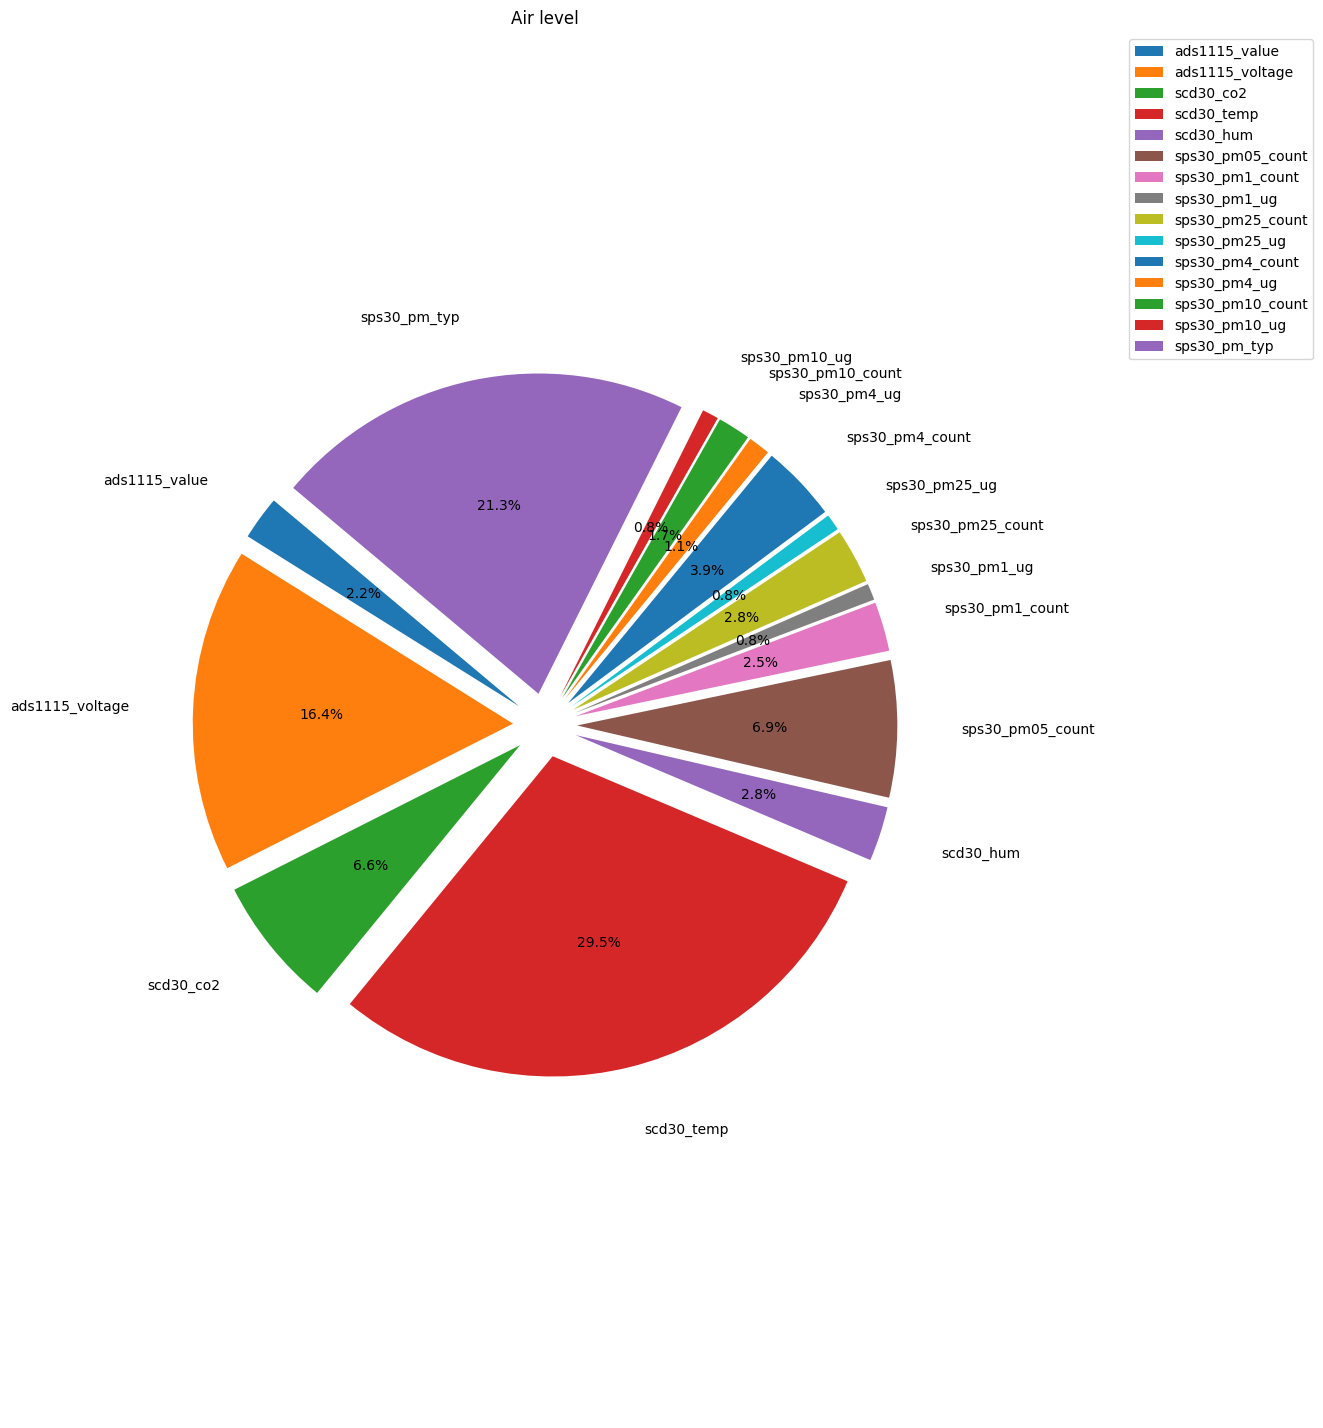

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['ads1115_value', 'ads1115_voltage',
       'scd30_co2', 'scd30_temp', 'scd30_hum', 'sps30_pm05_count',
       'sps30_pm1_count', 'sps30_pm1_ug', 'sps30_pm25_count', 'sps30_pm25_ug',
       'sps30_pm4_count', 'sps30_pm4_ug', 'sps30_pm10_count', 'sps30_pm10_ug',
       'sps30_pm_typ']

sizes = np.abs(df[['ads1115_value', 'ads1115_voltage',
       'scd30_co2', 'scd30_temp', 'scd30_hum', 'sps30_pm05_count',
       'sps30_pm1_count', 'sps30_pm1_ug', 'sps30_pm25_count', 'sps30_pm25_ug',
       'sps30_pm4_count', 'sps30_pm4_ug', 'sps30_pm10_count', 'sps30_pm10_ug',
       'sps30_pm_typ',]].sum().values)


explode = [0.1] * len(labels)  

# Create a pie chart
plt.figure(figsize=(10, 18))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode=explode,labeldistance=1.2) # The starting angle of the pie chart. This rotates the chart
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.title('Air level')
plt.axis('equal') 


plt.show()

# Historgam Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


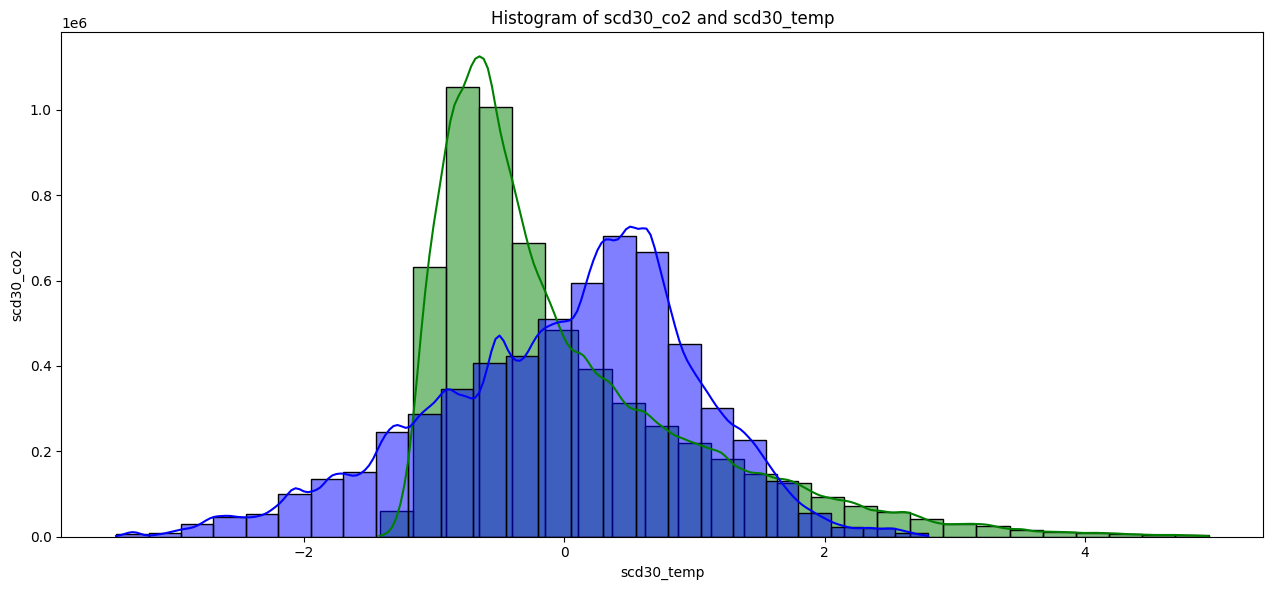

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt
#
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(df['scd30_co2'], bins=25, kde=True, color="green", ec="black")
sns.histplot(df['scd30_temp'], bins=25, kde=True, color='blue', ec="black")
plt.title('Histogram of scd30_co2 and scd30_temp')
plt.xlabel('scd30_temp')
plt.ylabel('scd30_co2')


plt.tight_layout()


plt.show()

# ANOVA

Let’s assume we want to analyze the CO2 concentration (scd30_co2) based on the day of the week (categorical variable). Hypotheses: Null Hypothesis (H₀): There is no significant difference in CO2 concentration across different days of the week. Alternative Hypothesis (H₁): There is a significant difference in CO2 concentration across different days of the week.

CO2 - F-statistic: 9543.3261651552, P-value: 0.0
Temperature - F-statistic: 8152.315843062349, P-value: 0.0
Humidity - F-statistic: 9597.91848925288, P-value: 0.0
Reject the null hypothesis for CO2: There is a significant difference in CO2 concentration across days of the week.
Reject the null hypothesis for Temperature: There is a significant difference in temperature across days of the week.
Reject the null hypothesis for Humidity: There is a significant difference in humidity across days of the week.


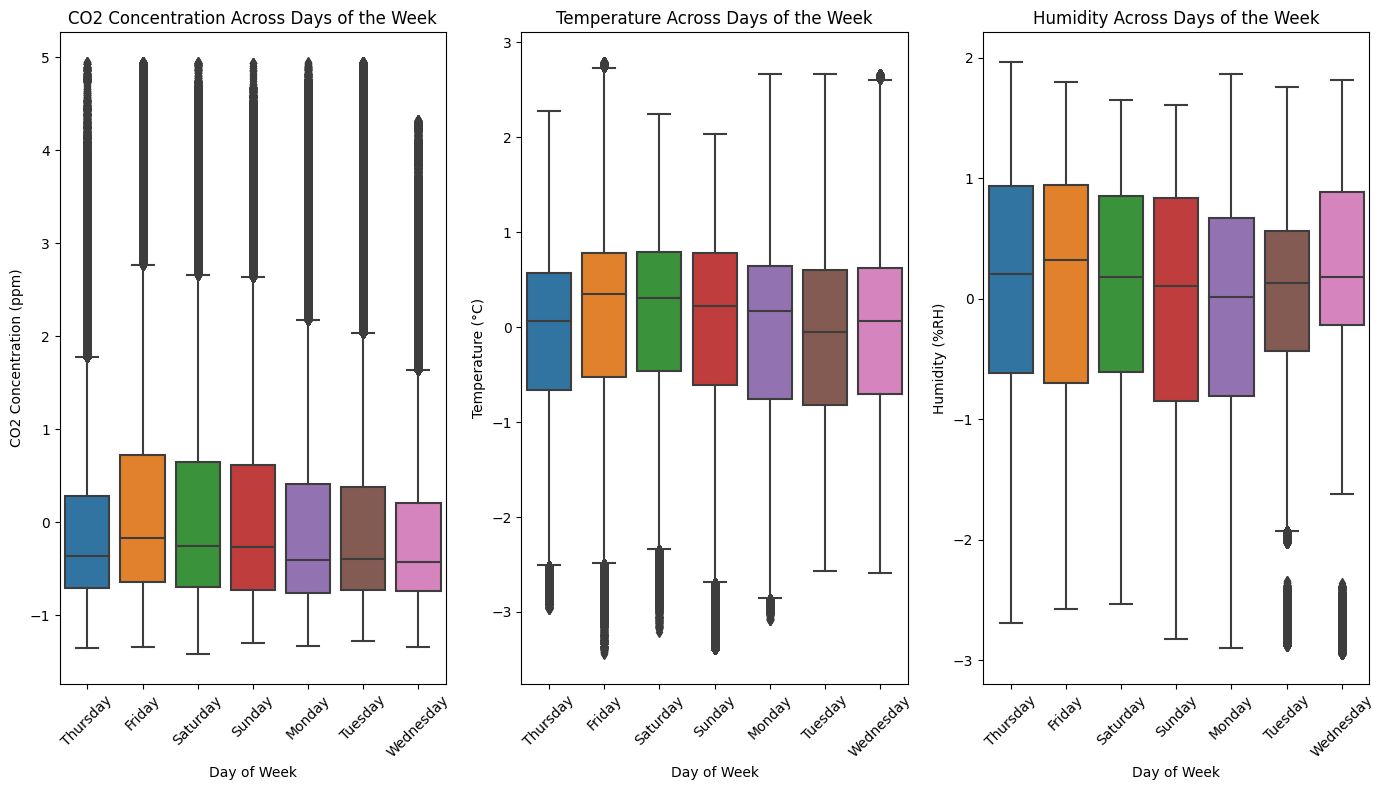

In [22]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Strip column names to avoid unwanted spaces
df.columns = df.columns.str.strip()

# Convert timestamp from Unix format to readable date
df['timestamp'] = pd.to_datetime(df['ts_insertion'], errors='coerce')

# Extract the day of the week from the timestamp
df['day_of_week'] = df['timestamp'].dt.day_name()

# Drop rows where CO2 or day_of_week is missing
df = df.dropna(subset=['scd30_co2', 'scd30_temp', 'scd30_hum', 'day_of_week'])

# ANOVA test for CO2 concentration across days of the week
f_stat_co2, p_value_co2 = stats.f_oneway(
    df[df['day_of_week'] == 'Monday']['scd30_co2'],
    df[df['day_of_week'] == 'Tuesday']['scd30_co2'],
    df[df['day_of_week'] == 'Wednesday']['scd30_co2'],
    df[df['day_of_week'] == 'Thursday']['scd30_co2'],
    df[df['day_of_week'] == 'Friday']['scd30_co2'],
    df[df['day_of_week'] == 'Saturday']['scd30_co2'],
    df[df['day_of_week'] == 'Sunday']['scd30_co2']
)

# ANOVA test for Temperature across days of the week
f_stat_temp, p_value_temp = stats.f_oneway(
    df[df['day_of_week'] == 'Monday']['scd30_temp'],
    df[df['day_of_week'] == 'Tuesday']['scd30_temp'],
    df[df['day_of_week'] == 'Wednesday']['scd30_temp'],
    df[df['day_of_week'] == 'Thursday']['scd30_temp'],
    df[df['day_of_week'] == 'Friday']['scd30_temp'],
    df[df['day_of_week'] == 'Saturday']['scd30_temp'],
    df[df['day_of_week'] == 'Sunday']['scd30_temp']
)

# ANOVA test for Humidity across days of the week
f_stat_hum, p_value_hum = stats.f_oneway(
    df[df['day_of_week'] == 'Monday']['scd30_hum'],
    df[df['day_of_week'] == 'Tuesday']['scd30_hum'],
    df[df['day_of_week'] == 'Wednesday']['scd30_hum'],
    df[df['day_of_week'] == 'Thursday']['scd30_hum'],
    df[df['day_of_week'] == 'Friday']['scd30_hum'],
    df[df['day_of_week'] == 'Saturday']['scd30_hum'],
    df[df['day_of_week'] == 'Sunday']['scd30_hum']
)

# Print F-statistic and P-value for CO2, Temperature, and Humidity
print(f"CO2 - F-statistic: {f_stat_co2}, P-value: {p_value_co2}")
print(f"Temperature - F-statistic: {f_stat_temp}, P-value: {p_value_temp}")
print(f"Humidity - F-statistic: {f_stat_hum}, P-value: {p_value_hum}")

# Significance level
alpha = 0.05  

# Hypothesis testing for each variable
if p_value_co2 < alpha:
    print("Reject the null hypothesis for CO2: There is a significant difference in CO2 concentration across days of the week.")
else:
    print("Fail to reject the null hypothesis for CO2: There is no significant difference in CO2 concentration across days of the week.")

if p_value_temp < alpha:
    print("Reject the null hypothesis for Temperature: There is a significant difference in temperature across days of the week.")
else:
    print("Fail to reject the null hypothesis for Temperature: There is no significant difference in temperature across days of the week.")

if p_value_hum < alpha:
    print("Reject the null hypothesis for Humidity: There is a significant difference in humidity across days of the week.")
else:
    print("Fail to reject the null hypothesis for Humidity: There is no significant difference in humidity across days of the week.")

# Visualizations for CO2, Temperature, and Humidity
plt.figure(figsize=(14, 8))

# CO2 Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='day_of_week', y='scd30_co2', data=df)
plt.title('CO2 Concentration Across Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(rotation=45)

# Temperature Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='day_of_week', y='scd30_temp', data=df)
plt.title('Temperature Across Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

# Humidity Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='day_of_week', y='scd30_hum', data=df)
plt.title('Humidity Across Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Humidity (%RH)')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


## T Test
We will perform a paired t-test to compare the means of two numerical columns, such as CO2 concentration (scd30_co2) and Temperature (scd30_temp), from the dataset. Hypothesis: Null Hypothesis (H₀): There is no significant difference between the means of CO2 concentration and Temperature. Alternative Hypothesis (H₁): There is a significant difference between the means of CO2 concentration and Temperature.

# Paired T-test for temperature and CO2

In [15]:
import pandas as pd
import scipy.stats as stats


df.columns = df.columns.str.strip()


df = df.dropna(subset=['scd30_co2', 'scd30_temp'])


t_stat, p_value = stats.ttest_rel(df['scd30_co2'], df['scd30_temp'])


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05  # Significance level (5%)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean CO2 concentration and mean temperature.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean CO2 concentration and mean temperature.")


T-statistic: 6.136475589643998e-12
P-value: 0.9999999999951038
Fail to reject the null hypothesis: There is no significant difference between the mean CO2 concentration and mean temperature.


# Paired t-test for temperature vs humidity

In [26]:
from scipy import stats

# Paired t-test for temperature vs humidity
t_stat_temp_hum, p_value_temp_hum = stats.ttest_rel(df['scd30_temp'], df['scd30_hum'])
print(f"T-statistic for Temperature vs Humidity: {t_stat_temp_hum}")
print(f"P-value for Temperature vs Humidity: {p_value_temp_hum}")

# Hypothesis Testing (Decision)
if p_value_temp_hum < alpha:
    print("Reject the null hypothesis: There is a significant difference between temperature and humidity.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between temperature and humidity.")


T-statistic for Temperature vs Humidity: -5.183190504163304e-12
P-value for Temperature vs Humidity: 0.9999999999958644
Fail to reject the null hypothesis: There is no significant difference between temperature and humidity.


# label encoding

In [17]:

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
label_encoders

{'node_id': LabelEncoder(),
 'ts_insertion': LabelEncoder(),
 'day_of_week': LabelEncoder()}

# the dataset after label encoding

In [29]:
df

,node_id,ads1115_value,ads1115_voltage,scd30_co2,scd30_temp,scd30_hum,sps30_pm05_count,sps30_pm1_count,sps30_pm1_ug,sps30_pm25_count,sps30_pm25_ug,sps30_pm4_count,sps30_pm4_ug,sps30_pm10_count,sps30_pm10_ug,sps30_pm_typ,ts_insertion,timestamp,day_of_week
0,0,1.582513,1.582474,-0.357060,0.458900,1.452205,0.430595,0.430210,0.429964,0.429974,0.428257,0.429940,0.426831,0.429931,0.426541,1.372416,0,2022-10-27 10:55:14,4
1,0,1.821107,1.821101,-0.365810,0.437458,1.445901,0.425499,0.425114,0.424867,0.424884,0.423166,0.424846,0.421740,0.424838,0.421451,1.254607,1,2022-10-27 10:55:16,4
2,0,1.821107,1.821101,-0.363417,0.447231,1.441817,0.430140,0.429753,0.429506,0.429519,0.427801,0.429486,0.426375,0.429477,0.426085,1.275893,2,2022-10-27 10:55:18,4
3,0,1.719578,1.719574,-0.366777,0.447231,1.452027,0.430140,0.429753,0.429506,0.429519,0.427801,0.429486,0.426375,0.429477,0.426085,1.275893,3,2022-10-27 10:55:20,4
4,0,1.618048,1.618008,-0.377280,0.437458,1.444372,0.430140,0.429753,0.429506,0.429519,0.427801,0.429486,0.426375,0.429477,0.426085,1.275893,4,2022-10-27 10:55:22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928225,0,0.125570,0.125533,0.570247,-0.403894,0.523921,1.340019,1.339633,1.339389,1.339401,1.337602,1.339362,1.336021,1.339358,1.335689,0.994790,5928225,2023-10-13 08:04:12,0
5928226,0,0.130647,0.130610,0.569047,-0.403894,0.520853,1.391797,1.391418,1.391173,1.391184,1.389384,1.391142,1.387788,1.391140,1.387454,0.986353,5928226,2023-10-13 08:04:14,0
5928227,0,0.034194,0.034160,0.565549,-0.394121,0.514727,1.400235,1.399848,1.399606,1.399619,1.397813,1.399581,1.396221,1.399571,1.395887,1.096057,5928227,2023-10-13 08:04:17,0
5928228,0,0.130647,0.125533,0.550243,-0.394121,0.519324,1.426430,1.426048,1.425803,1.425816,1.424010,1.425777,1.422408,1.425768,1.422072,1.086870,5928228,2023-10-13 08:04:19,0


# Dropping Nine Columns

As this column had a correlation value 1,this column led the dataset in a bad shape.

In [18]:
df.drop(columns=['sps30_pm05_count'],inplace=True)
df.drop(columns=['sps30_pm1_count'],inplace=True)
df.drop(columns=['sps30_pm1_ug'],inplace=True)
df.drop(columns=['sps30_pm25_count'],inplace=True)
df.drop(columns=['sps30_pm25_ug'],inplace=True)
df.drop(columns=['sps30_pm4_count'],inplace=True)
df.drop(columns=['sps30_pm4_ug'],inplace=True)
df.drop(columns=['sps30_pm10_count'],inplace=True)
df.drop(columns=['sps30_pm10_ug'],inplace=True)






In [19]:
df.columns

Index(['node_id', 'ads1115_value', 'ads1115_voltage', 'scd30_co2',
       'scd30_temp', 'scd30_hum', 'sps30_pm_typ', 'ts_insertion', 'timestamp',
       'day_of_week'],
      dtype='object')

# after dropping column the co-relation matrix

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


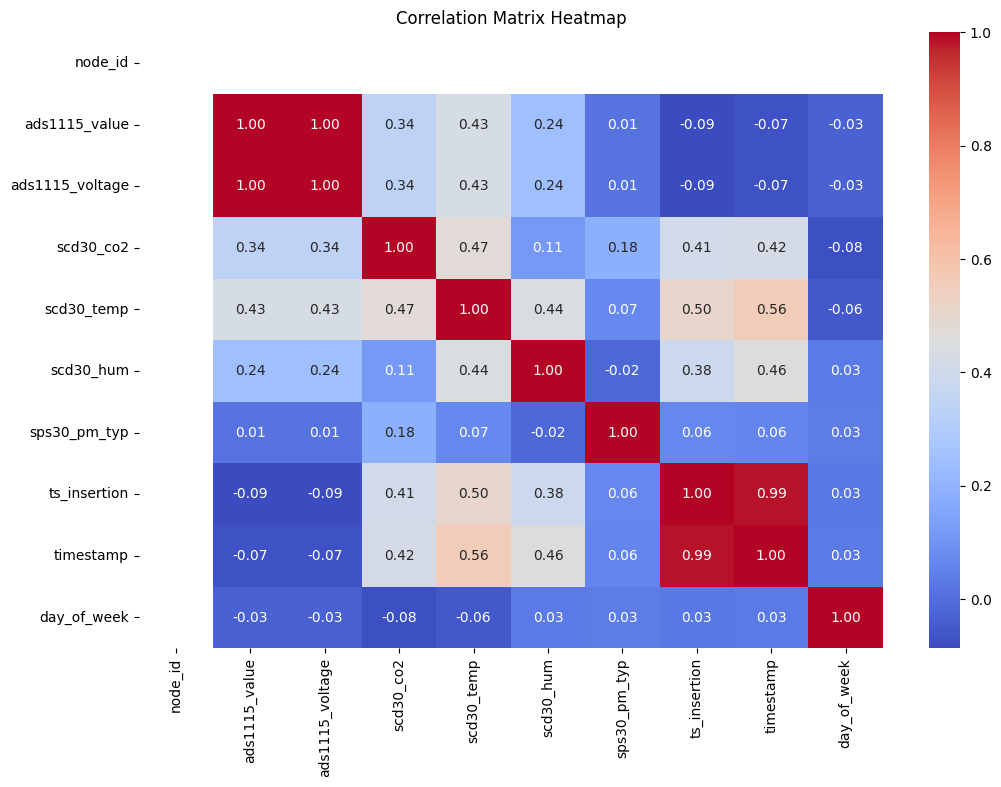

In [21]:
numerical_columns = ['node_id', 'ads1115_value', 'ads1115_voltage', 'scd30_co2',
       'scd30_temp', 'scd30_hum', 'sps30_pm_typ', 'ts_insertion', 'timestamp',
       'day_of_week']

correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Taking the tagert value

In [20]:
target_col = 'scd30_temp'

X = df.drop(columns=[target_col, 'ts_insertion', 'timestamp']) 
y = df[target_col]

# 30 percent train data

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.3, random_state=42)

# random forest model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions using the trained model
y_pred = rf_model.predict(X_test)

# Step 3: Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)  # R-squared
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)

# Step 4: Print the results
print(f"Random Forest R-squared on Sample: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Random Forest R-squared on Sample: 0.98
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.12
Mean Absolute Error (MAE): 0.05


# predicted versus actual value plot

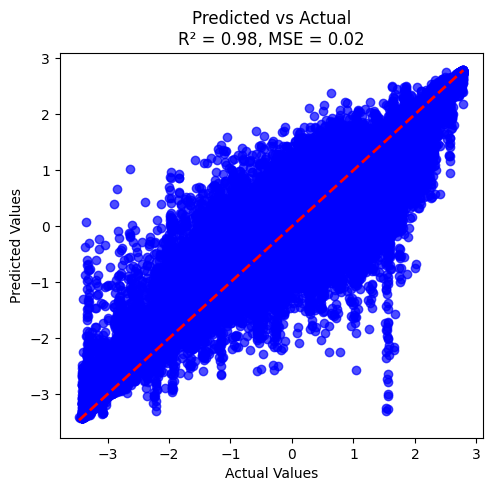

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest Regressor

# Assuming you have your feature matrix `X` and target vector `y` already defined
# For example:
# X = your_data.drop(columns='target_column')
# y = your_data['target_column']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# Plotting
plt.figure(figsize=(12, 5))

# Subplot 1: Predicted vs Actual plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs Actual\nR² = {r2:.2f}, MSE = {mse:.2f}")

# Show plot
plt.show()


# high corelation column

In [ ]:


correlation_matrix = df[[target_col, 'scd30_co2', 'scd30_hum']].corr()  


high_corr = correlation_matrix.index[correlation_matrix[target_col] > 0.5]  
high_corr

# Xgboost model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

# Step 1: Initialize and train the XGBRegressor model
xgb_model = XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions using the trained model
y_pred = xgb_model.predict(X_test)

# Step 3: Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)  # R-squared
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)

# Step 4: Print the results
print(f"XGBoost R-squared on Sample: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


XGBoost R-squared on Sample: 0.78
Mean Squared Error (MSE): 0.22
Root Mean Squared Error (RMSE): 0.47
Mean Absolute Error (MAE): 0.33


# Linear regeression model

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 2: Make predictions using the trained model
y_pred = lr_model.predict(X_test)

# Step 3: Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)  # R-squared
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)

# Step 4: Print the results
print(f"Linear Regression R-squared on Sample: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Linear Regression R-squared on Sample: 0.42
Mean Squared Error (MSE): 0.58
Root Mean Squared Error (RMSE): 0.76
Mean Absolute Error (MAE): 0.60


# neural network model

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.neural_network import MLPRegressor

# Step 1: Initialize and train the Neural Network model (MLPRegressor)
nn_model = MLPRegressor(random_state=42, max_iter=1000)  # You can adjust parameters like max_iter and others
nn_model.fit(X_train, y_train)

# Step 2: Make predictions using the trained model
y_pred = nn_model.predict(X_test)

# Step 3: Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)  # R-squared
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)

# Step 4: Print the results
print(f"Neural Network R-squared on Sample: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Neural Network R-squared on Sample: 0.71
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.54
Mean Absolute Error (MAE): 0.40


# GNN (Graph Neural Network)

In [26]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Step 1: Define the GNN Model
class GNNRegressor(torch.nn.Module):
    def __init__(self, input_features, hidden_units, output_features):
        super(GNNRegressor, self).__init__()
        self.conv1 = GCNConv(input_features, hidden_units)  # First Graph Convolutional Layer
        self.conv2 = GCNConv(hidden_units, output_features)  # Second Graph Convolutional Layer

    def forward(self, x, edge_index):
        # Apply two Graph Convolutional Layers
        x = self.conv1(x, edge_index)
        x = torch.relu(x)  # ReLU activation
        x = self.conv2(x, edge_index)
        return x

# Step 2: Assuming the model is already trained, load the pre-trained GNN model
# Example: gnn_model = joblib.load('gnn_model.pkl')  # Load the pre-trained GNN model

# Example input (features and graph structure)
# Assume X_train, X_test are your node features and edge_index is your graph connectivity for train/test data
# Example (dummy data):
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)  # Convert DataFrame to numpy array
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)  # Convert DataFrame to numpy array

# Example edge_index (this should be actual graph data for your use case)
# Assuming you have edge indices (graph connectivity)
edge_index_train = torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)  # Example edge indices for train
edge_index_test = torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)  # Example edge indices for test

# Initialize GNN model
gnn_model = GNNRegressor(input_features=X_train.shape[1], hidden_units=64, output_features=1)

# Step 3: Make predictions using the trained GNN model
gnn_model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No gradient calculation during inference
    y_pred_gnn = gnn_model(X_test_tensor, edge_index_test).detach().numpy()

# Step 4: Calculate evaluation metrics for the GNN model
r2 = r2_score(y_test, y_pred_gnn)  # R-squared
mse = mean_squared_error(y_test, y_pred_gnn)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred_gnn)  # Mean Absolute Error (MAE)

# Step 5: Print the results
print(f"GNN R-squared on Sample: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


GNN R-squared on Sample: -0.88
Mean Squared Error (MSE): 1.88
Root Mean Squared Error (RMSE): 1.37
Mean Absolute Error (MAE): 1.08


#  Long Short-Term Memory (LSTM) model

In [22]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Prepare your data
# Assume X and y are already defined
# X should be a 2D array of features, y should be a 1D array (target)

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)  # Scale features
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Convert Series to numpy array before reshaping and scaling

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Reshape the data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 3: Initialize the LSTM model
model = Sequential()

# Adding LSTM layer (with 50 units here, adjust according to your need, i have added 40 unit)
model.add(LSTM(units=40, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(units=1))  # Output layer

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Inverse transform the scaled predictions and true values (back to original scale)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Step 8: Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)  # R-squared
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)

# Step 9: Print the results
print(f"LSTM R-squared on Sample: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 152s 1ms/step - loss: 0.0137
Epoch 2/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0112
Epoch 4/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 149s 1ms/step - loss: 0.0110
Epoch 5/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0109
Epoch 6/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0108
Epoch 8/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0106
Epoch 10/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 151s 1ms/step - loss: 0.0105
Epoch 12/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0104
Epoch 14/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 149s 1ms/step - loss: 0.0103
Epoch 16/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 149s 1ms/step - loss: 0.0103
Epoch 17/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0103
Epoch 18/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 149s 1ms/step - loss: 0.0102
Epoch 19/40
129681/129681 ━━━━━━━━━━━━━━━━━━━━ 149s 1ms/step - loss: 0.0102
Epoch 20/40
129681

# ARIMA (AutoRegressive Integrated Moving Average)

ARIMA Mean Squared Error (MSE): 4.19
ARIMA R-squared: -1.95
ARIMA Root Mean Squared Error (RMSE): 2.05
ARIMA Mean Absolute Error (MAE): 1.85


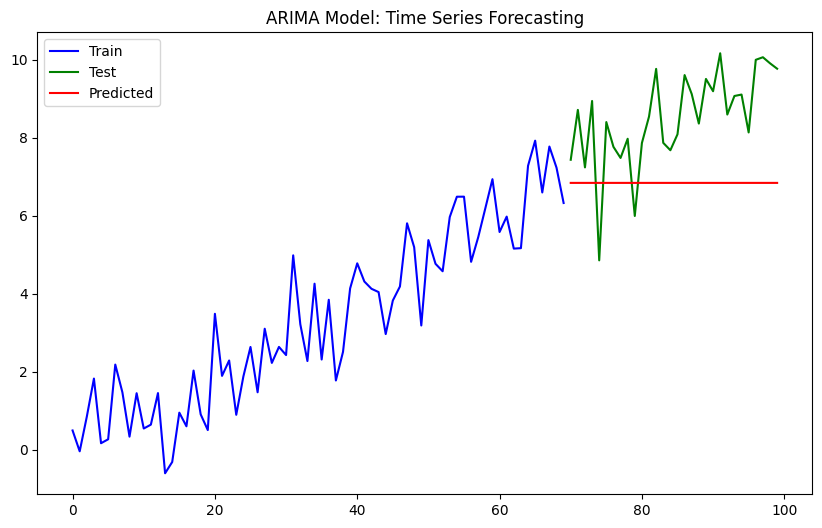

In [29]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Prepare your data (X should be your time series data)
# For demonstration purposes, we'll use a synthetic time series dataset
# In real cases, you would load your own data (e.g., from a CSV file)
# Here we're assuming `data` is a pandas Series or a 1D numpy array

# Example: Generating synthetic time series data (e.g., monthly data)
np.random.seed(42)
data = np.random.randn(100) + np.linspace(0, 10, 100)  # synthetic time series data

# Step 2: Split the data into training and test sets
train_size = int(len(data) * 0.7)
train, test = data[:train_size], data[train_size:]

# Step 3: Fit the ARIMA model
# ARIMA parameters: (p, d, q)
# p = number of autoregressive terms (lags)
# d = degree of differencing
# q = number of moving average terms
# Here, let's use ARIMA(1, 1, 1) as an example
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Step 4: Make predictions on the test set
y_pred = model_fit.forecast(steps=len(test))  # Forecast the next len(test) points

# Step 5: Calculate evaluation metrics
mse = mean_squared_error(test, y_pred)  # Mean Squared Error
r2 = r2_score(test, y_pred)  # R-squared
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(test, y_pred)  # Mean Absolute Error (MAE)

# Step 6: Print the results
print(f"ARIMA Mean Squared Error (MSE): {mse:.2f}")
print(f"ARIMA R-squared: {r2:.2f}")
print(f"ARIMA Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"ARIMA Mean Absolute Error (MAE): {mae:.2f}")

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label='Train', color='blue')
plt.plot(range(len(train), len(train) + len(test)), test, label='Test', color='green')
plt.plot(range(len(train), len(train) + len(test)), y_pred, label='Predicted', color='red')
plt.legend()
plt.title("ARIMA Model: Time Series Forecasting")
plt.show()


# K-fold validation

In [ ]:
from sklearn.model_selection import KFold, train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



# Convert the dataset into a graph format suitable for GNN (Example)
# In this case, we assume each row is a node, and edges are created based on some similarity (e.g., nearest neighbors)
# For simplicity, let's assume a random graph structure. In practice, this will depend on your data.

# Create graph data with dummy edge_index (replace with real graph data)
# edge_index is the connectivity between nodes in the graph
edge_index = torch.tensor([[0, 1, 2, 3, 4], [1, 2, 3, 4, 0]], dtype=torch.long)  # Example edges

# Normalize the features (X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_tensor = torch.tensor(X_scaled, dtype=torch.float)

# Prepare dataset for PyTorch Geometric (GNN)
data = Data(x=X_tensor, edge_index=edge_index)

# Define the GNN Model (Graph Convolutional Network)
class GNNModel(torch.nn.Module):
    def __init__(self, input_features, output_features):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_features, 64)  # Graph Convolution Layer
        self.conv2 = GCNConv(64, output_features)  # Second Graph Convolution Layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply first conv layer with ReLU activation
        x = self.conv2(x, edge_index)  # Apply second conv layer
        return x

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "GNN": GNNModel(input_features=X_tensor.shape[1], output_features=1)  # GNN for regression (output=1)
}

# KFold Cross Validation for RandomForest, XGBoost, and GNN
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results = {model_name: [] for model_name in models}

# Perform K-Fold Cross Validation
for model_name, model in models.items():
    fold_accuracies = []
    fold_r2_scores = []
    fold_mse = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if model_name == "GNN":
            # For GNN, we need to convert data into graph format for each fold
            train_data = Data(x=torch.tensor(X_train.values, dtype=torch.float), edge_index=edge_index)  # Replace edge_index with real edges
            test_data = Data(x=torch.tensor(X_test.values, dtype=torch.float), edge_index=edge_index)

            # Train the GNN model
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
            criterion = torch.nn.MSELoss()

            # Training loop
            model.train()
            optimizer.zero_grad()
            output = model(train_data)
            loss = criterion(output, torch.tensor(y_train.values, dtype=torch.float).view(-1, 1))
            loss.backward()
            optimizer.step()

            # Test the GNN model
            model.eval()
            with torch.no_grad():
                output = model(test_data)
                y_pred = output.view(-1).numpy()

        else:
            # Train the traditional models (RandomForest, XGBoost)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        fold_accuracies.append(mse)
        fold_r2_scores.append(r2)
        fold_mse.append(mse)

    results[model_name] = {
        'Average MSE': np.mean(fold_mse),
        'Average R2': np.mean(fold_r2_scores),
        'Average Accuracy': np.mean(fold_accuracies),
    }

# Print out the results
print("Random Forest, XGBoost, GNN results:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


# Explainable AI(XAI)

In [ ]:
!pip install shap

# Shap

The Explainable has been runed on 20 lac data as the dataset was vast and could allocate the memory

In [48]:

import shap
import matplotlib.pyplot as plt

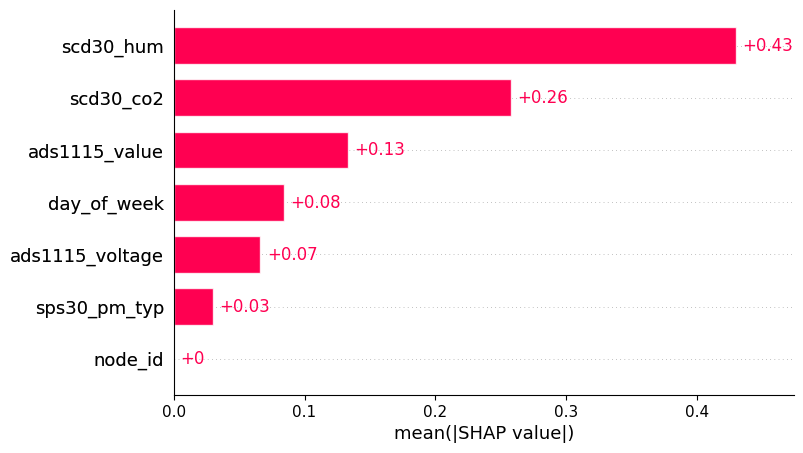

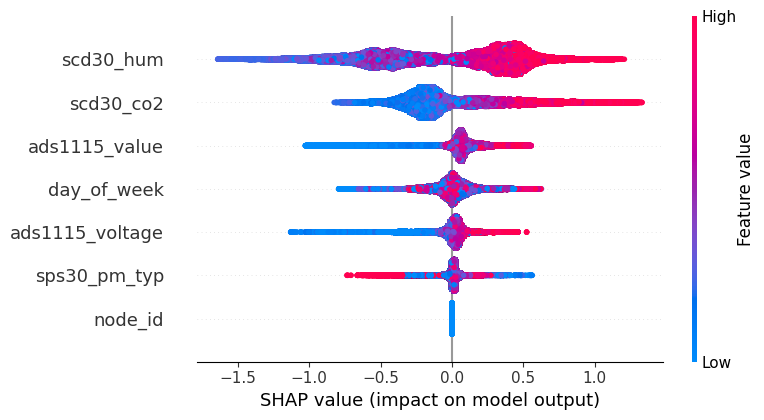

In [49]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model with fewer trees for efficiency
rf_model = RandomForestRegressor(n_estimators=30,  # Reduce trees to save memory
                                 max_depth=10,     # Limit tree depth to avoid overfitting
                                 random_state=42, 
                                 n_jobs=-1)        # Use all CPU cores
rf_model.fit(X_train_scaled, y_train)

# SHAP Explainer (use approximate=True for efficiency)
explainer = shap.TreeExplainer(rf_model, feature_perturbation="tree_path_dependent", approximate=True)

# Reduce memory usage: sample only 1,000 rows from X_test
X_test_sampled = shap.sample(X_test_scaled, 2000000, random_state=42)  # 20lac rows to avoid high memory usage

# Compute SHAP values efficiently
shap_values = explainer.shap_values(X_test_sampled, check_additivity=False)  # Avoids extra computation

# Efficient SHAP Explanation object
shap_values_explanation = shap.Explanation(values=shap_values, 
                                           base_values=explainer.expected_value,
                                           data=X_test_sampled, 
                                           feature_names=X.columns.tolist())

# SHAP bar plot (show top 10 features)
shap.plots.bar(shap_values_explanation, max_display=10)

# SHAP summary bee-swarm plot (show only sampled data)
shap.summary_plot(shap_values_explanation, X_test_sampled, plot_type="dot", feature_names=X.columns.tolist())


# Shap forceplot

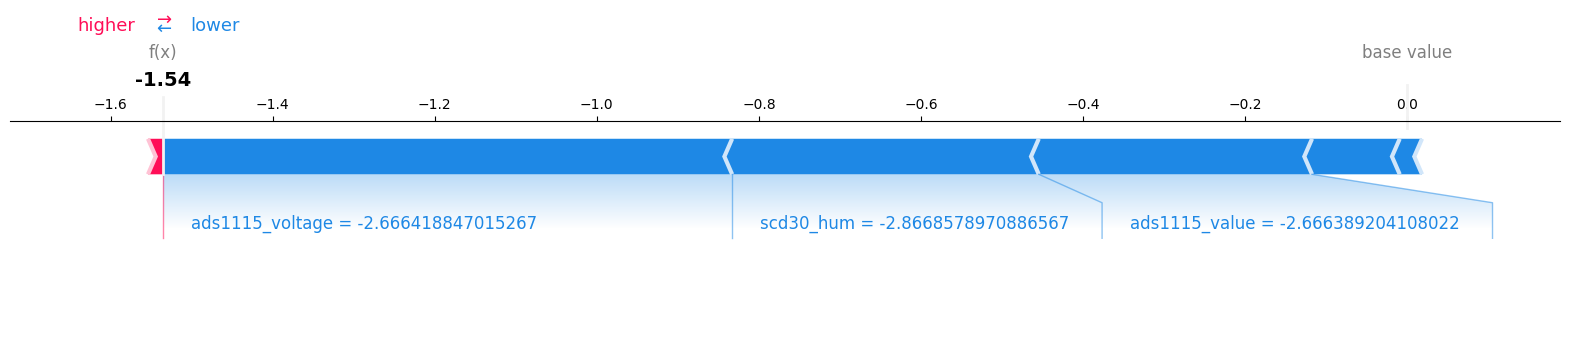

In [25]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib


X_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data
X_train = pd.DataFrame(X_scaled, columns=X.columns)  # Maintain column names in training set

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50,  
                                 max_depth=10,     
                                 random_state=42, 
                                 n_jobs=-1)        
rf_model.fit(X_train, y_train)

# Initialize SHAP JavaScript
shap.initjs()  

# SHAP Explainer with `approximate=True`
explainer = shap.TreeExplainer(rf_model, feature_perturbation="tree_path_dependent", approximate=True)

# Select an instance from the test set (e.g., instance_index = 10)
instance_index = 10
instance = X_test.iloc[[instance_index]]  # Use X_test to select the test sample

# Standardize the test set instance using the same scaler as for training data
instance_scaled = scaler.transform(instance)  # Standardize using the already fitted scaler

# Compute SHAP values efficiently for the instance
shap_values = explainer.shap_values(instance_scaled, check_additivity=False)  

# Plot SHAP force plot for the selected instance
shap.force_plot(explainer.expected_value, shap_values[0], instance_scaled, feature_names=X.columns, matplotlib=True)
plt.show()


# Lime

The Lime has been runed on 20 lac data as the dataset was vast and could allocate the memory

In [23]:
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to maintain feature names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=50,  
                                 max_depth=10,     
                                 random_state=42, 
                                 n_jobs=-1)        
rf_model.fit(X_train, y_train)

# Adaptive sampling size for LIME (max 100,000 samples)
sample_size = min(2000000, X_train.shape[0])  # Adjust based on dataset size

# Create a LimeTabularExplainer with sampled data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.sample(sample_size, random_state=42).to_numpy(),  
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Select a random instance to explain and keep feature names
instance = X_test.sample(1, random_state=42)

# Generate explanation
explanation = explainer.explain_instance(
    data_row=instance.iloc[0].to_numpy(),  # Convert row to array
    predict_fn=rf_model.predict,
    num_features=5
)

# Show explanation in the notebook
explanation.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
